# Neural Network Fundamentals. Gentle Introduction

## Intro: Imagine the following problem.
There are handwritten numbers that you want computer to correctly clasify. It would be an easy task for a person but an extremely complicated one for a machine, especially, if you want to use some traditional prediction model, like linear regression. Even though the computer is faster than the human brain in numeric computations, the brain far outperforms the computer in some tasks.

<img src="pics/problem.png" alt="Drawing" style="width: 600px;"/>

## Some intuition from the Nature

People struggled to teach machines to solve this kind of problems for a long time without success.
Unless they noticed a very peculiar thing. Nature creatures, even the simple ones, for instance 
insects, can perform complicated task with very limited brain capacities, which are far below 
those of the computers. So there is something nature has developed that aloows to solve tasks 
apparently complicated for machines tasks in a smart way.
One of the ides that came to mind is to replicate the structure and certain functions of nature beigns 
brain and neurosystem that allow for cognitive procecess and beyond.
A particular example of such structures is neuron system.

<img src="pics/neurons.png" alt="Drawing" style="width: 600px;"/> [Source: https://www.jstor.org/stable/pdf/2684922.pdf]

<img src="pics/neurons_net3.png" alt="Drawing" style="width: 500px;"/> [Source: https://pixabay.com/]

A particular detail about how are our cognitive and perceptive processes organised is a complicated 
structure of simple elements which create a complex net where each element is connected with othere 
receiving and transmitting information. An idea to reemplement such a structure in order to make 
predictions gave birth to what we now now as neural network models.

### Early development:
##### 1943
McCulloch-Pitts model of the neuron. The neuron receives a weighted sum of inputs from connected units, and outputs a value of one (fires) if this sum is greater than a thresh- old. If the sum is less than the threshold, the model neuron outputs a zero value.

##### Early 1960s
Rosenblatt developed a model called simple perceptron. The simple perceptron consists of McCulloch- Pitts model neurons that form two layers, input and output. His model was able to find a solution to classification problems if the problem was linearly separable.
Later on Minsky and Papert addressed the linear severability limitation of Rosenblatt model. He knew it himself but could not figure it out.
This hindered the process of NNs development.

##### 1982
Hopfield Model used mainly for optimization problems like travel sales man problem
Later on, the idea of backpropagation was introduced and it addressed the earlier problems of the simple perceptron and renewed interest in neural networks. Backpropagation training algorithm is capable of solving nonlinear separable problems.

### Differnt Applications
At the current stage NNs are capable to model many of the capabilities of the human brain and beyond.
On a practical level the human brain has many features that are desirable in an electronic computer. The human brain has the ability to generalize from abstract ideas, recognize patterns in the presence of noise, quickly recall memories, and withstand localized damage.

Usages of NNS:
- identifying underwater sonar contacts
- predicting heart problems in patients
- diagnosing hypertension
- recognizing speech
- the preferred tool in predicting protein secondary structures

Staticians use these models to address the same problems:
- discriminant analysis
- logistic regression
- Bayes and other types of classifiers
- multiple regression
- time series models such as ARIMA and other forecasting methods

## Schematic Representation

All the aplications of neural networks mentioned above have in common a simlified structure depicted on the following picture.

<img src="pics/neural_network1.png" alt="Drawing" style="width: 700px;"/>

# Implementation of the NN from scratch

Let's try to reimlement such a structure using Python. 

The crutial elements are:
* layers
* nodes
* weights between them
* activation function

In [49]:
# Load the package to work with numbers
import numpy as np

In [50]:
# Determine the structure of the NN
i_n = 3
h_n = 5
o_n = 2
# i_n, h_n and o_n stand here for the number of nodes in input, hidden and output layers respectively 
# - exactly as on the picture above

In [52]:
# Randomly define the weights between nodes 
w_i_h = np.random.rand(h_n, i_n)
w_h_o = np.random.rand(o_n, h_n)

# Show matrices of randomly assigned weights
w_i_h
# w_h_o

array([[ 0.16320867,  0.27111435,  0.05803869],
       [ 0.60824488,  0.06341481,  0.38990072],
       [ 0.71077665,  0.23453235,  0.42572539],
       [ 0.91378956,  0.84418591,  0.52465855],
       [ 0.23073563,  0.84500162,  0.62394   ]])

## Activation Function

Besides complicated multilayer structure with many nodes neurosystems in nature has one more important feature - neurons in them send signal further or "fire" only when they get a signal that is strong enough - stronger than certain treshold. This can be represented by a step function.

<img src="pics/step_function.png" alt="Drawing" style="width: 700px;"/> [Source: https://www.researchgate.net/figure/Three-different-types-of-transfer-function-step-sigmoid-and-linear-in-unipolar-and_306323136]

In [53]:
# Determine activation function which is an approximation for "firing" of neurons
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

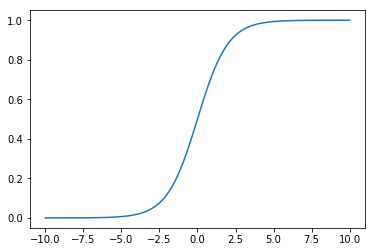

In [54]:
# Draw this function
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

## Inspect the Data

It seems like all the elements of our neural network structure are ready. Can we use this structure to tackle the problem?

Let's take a look at our data.

In [55]:
# Load the data
raw_data = open("data/mnist_train_100.csv", 'r')
data = raw_data.readlines()
raw_data.close()

# The sourse of the data can be found here
# https://pjreddie.com/projects/mnist-in-csv/
# http://yann.lecun.com/exdb/mnist/

In [57]:
# Inspect the data - check the number of observations
len(data)

100

In [58]:
# Inspect a particular observation of the data and explain it
data[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [59]:
# Load the package to plot the data
import matplotlib.pyplot as mpp
%matplotlib inline

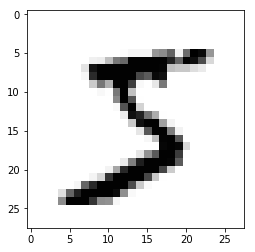

In [60]:
# Plot the data
observation = data[0].split(',')
image = np.asfarray(observation[1:]).reshape((28,28))
mpp.imshow(image, cmap='Greys', interpolation='None')

In [61]:
# save an observation of the data as an input to work with.

inputs = np.array(np.asfarray(observation[1:]), ndmin=2).T

In [62]:
inputs

array([[   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [

## Fit draft of the NN to the Data

<img src="pics/neural_network1.png" alt="Drawing" style="width: 700px;"/>

As we can see we have 784 elements in our inputs. Therefore it would be logical to update the structure of the neural network. Instead of 3 input nodes we will have 784. Accordinly, as we have 10 different options for the outcome *from 0 to 9) we schould better have 10 output nodes instead of 1. 100 nodes in the hidden layer have been assigned as something in between 784 and 10.

In [63]:
# Determine the structure of the NN
i_n = 784
h_n = 90
o_n = 10

In [68]:
# Represent output layer as a vector of 0 and ones where the position of 1 corresponds to the number we want to predict
targets = np.array(np.zeros(o_n), ndmin=2).T
targets[int(observation[0])] = 1

In [69]:
# let's have a look at how our output layer looks like 
# (remember that our observations corrsponds to the number 5)
targets

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

As we have new structure of the NN we should reasign the weights - now the size of each weight matrix will increase as we have more nodes in each layer.

In [70]:
# Determine the weights
w_i_h = np.random.rand(h_n, i_n)
w_h_o = np.random.rand(o_n, h_n)

In [72]:
# Show the sizes of matrices of weights, input and output vectors
w_i_h.shape, inputs.shape, w_h_o.shape, targets.shape

((90, 784), (784, 1), (10, 90), (10, 1))

## Feed forward

Once we have the structure of the NN updated for the specific task of prediciting numbers depicted on the images, we can  run our network to get its first predictions. To do so we will have to make several steps and each of them will consist of a matrix multiplication and application of the sygmoid function. Multiply a vector of inputs by a matrix of weights that connects it with the next layer, transform the result using activation function - this is one step and it schould be repeated for all the layers except for the input one. Every time the output of the previous leyer will be used as a vector of inputs for the next layer.

<img src="pics/multiplication.png" alt="Drawing" style="width: 800px;"/>

<img src="pics/activation.png" alt="Drawing" style="width: 800px;"/>

In [73]:
# Calculate the outputs of hidden and output layers of our NN
h_inputs = np.dot(w_i_h, inputs)
h_outputs = sigmoid(h_inputs)
o_inputs = np.dot(w_h_o, h_outputs)
o_outputs = sigmoid(o_inputs)

In [74]:
# Show intermediate data and outputs
# h_inputs
# h_outputs
# o_inputs
o_outputs

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

- It seems like we have some serious mistake here. 
- Already at the point of h_outputs all the data converts to 1.
- There could be several reasons for that. 
- First of all, let's take a look at our sigmoid function once again:

## Why don't we get what we expected?

To understand the reason let's take a look at our sygmoid function once again

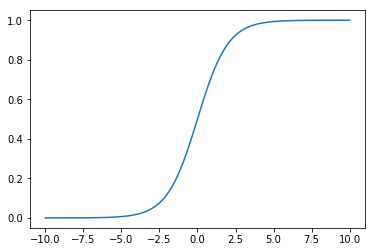

In [76]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.show()

As we can see the uotput of it will be almost identical once we feed a number bigger than 2 or smaller than -2. Big numbers are a problem for our activation fucntion as it can't find the difference between them. One solution will be to transform the inputs we have. They schould be in the range between 0 and 1. 0 schould not be included because the result of multiplication of an input equal to 0 by whichever weight will be equal to 0, hence our NN will not be able to use this input to learn anything valuable.

In [77]:
# The correct way to define inputs:
inputs = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

# Correct way to define targets:
targets = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
targets[int(observation[0])] = 0.99

Secondly, we can check our way to randomly assign initial weights:

In [80]:
np.random.rand(3, 4)

array([[ 0.04185732,  0.29350618,  0.63001588,  0.0126964 ],
       [ 0.0646726 ,  0.06597453,  0.40517252,  0.66042894],
       [ 0.95086174,  0.44122473,  0.45078402,  0.99430976]])

All the weights are positive, while there should be an apportunity for negative ways.


In [81]:
# The correct way to define random weights:
    
alternative1 = np.random.rand(3, 4) - 0.5 
# or
alternative2 = np.random.normal(0.0, pow(3, -0.5), (3, 4)) 
# second approach is better as it takes in account the standard deviation 
# that is related to the number of incoming links into a node, 1/√(number of incoming links).

# alternative1
alternative2

array([[-0.33291307,  0.42110442, -0.6618691 ,  0.60917865],
       [-0.82005401,  0.4071739 , -0.63484775, -0.72903569],
       [ 0.06120286,  0.60725441,  0.30808221, -0.29828123]])

In [82]:
# define the weights in a proper way
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

In [83]:
# run NN to get new prediciton for a particular observation
h_inputs = np.dot(w_i_h, inputs)
h_outputs = sigmoid(h_inputs)
o_inputs = np.dot(w_h_o, h_outputs)
o_outputs = sigmoid(o_inputs)
o_outputs

array([[ 0.21958917],
       [ 0.10071162],
       [ 0.578832  ],
       [ 0.72442982],
       [ 0.27875378],
       [ 0.36385897],
       [ 0.42552136],
       [ 0.81739875],
       [ 0.12968912],
       [ 0.14382971]])

## How good are we now?

Now that we have all steps done in a right way we can check our output once again and compare it to target value.

In [89]:
o_errors = targets - o_outputs
o_errors

array([[-0.20958917],
       [-0.09071162],
       [-0.568832  ],
       [-0.71442982],
       [-0.26875378],
       [ 0.62614103],
       [-0.41552136],
       [-0.80739875],
       [-0.11968912],
       [-0.13382971]])

We have not expected any good result at this stage as all the weights have been assigned randomly and no training has been performed yet. Nevertheless, is not just useless vector of "1" anymore.

## Backpropagation

Output of each node is the sum of the multiplications of the outputs of previous nodes by certain weights. Therefore we can associate how much error is comming with every weight and how much error has been brought from each particular node from the previous layer as depicted on the pictures below.

<img src="pics/bp_1.png" alt="Drawing" style="width: 800px;"/>

<img src="pics/bp_2.png"  alt="Drawing" style="width: 900px;"/> [Source: https://ebook4expert.com/2016/07/12/make-your-own-neural-network-ebook-free-by-tariq-rashid-epubmobi/]

To do so in python we just need to make matrix miltiplication of erros and weights

In [ ]:
# find the errors associated with hidden layer output
h_errors = np.dot(w_h_o.T, o_errors)
h_errors

## Updating weights

So, how do we improve the weights we have assigned randomly at the beginning, so that the overall resilt improves?

<img src="pics/formula2.png"  alt="Drawing" style="width: 1000px;"/>

<img src="pics/formula3.png"  alt="Drawing" style="width: 1000px;"/>

<img src="pics/formula5.png"  alt="Drawing" style="width: 1000px;"/>

In [91]:
# update the matrix for weights between hidden and output layers
w_h_o += np.dot((o_errors * o_outputs * (1.0 - o_outputs)), np.transpose(h_outputs))
# update the matrix for weights between input and hidden layers
w_i_h += np.dot((h_errors * h_outputs * (1.0 - h_outputs)), np.transpose(inputs))

In [92]:
%%html
<iframe src="https://giphy.com/embed/8tvzvXhB3wcmI" width="1000" height="400" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>
<p><a href="https://giphy.com/gifs/deep-learning-8tvzvXhB3wcmI">via GIPHY</a></p>

In [ ]:
# If the previous code does not display the gif file delete the previous cell and uncomment the following code
# import IPython
# url = 'https://giphy.com/embed/8tvzvXhB3wcmI'
# iframe = '<iframe src="https://giphy.com/embed/8tvzvXhB3wcmI" width="1000" height="400" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>'
# IPython.display.HTML(iframe)

## Learning Rate

Now, there is something else, we forgot when updating our weights. If we completely change our weights with every new observation - our model learns to predict only the last input. Instead of updating weights 100 % every time we can change them only partially - this way every new observstion will bring some new knowledge while the previous one will still be in memory even though updated to certain extent. The bigger the learning rate the more importance has the last observation, the smaller it is the more important is all the previous knowledge. The smaller the steps - the more accurate will be the prediction. At the same time it might take more time to learn.

<img src="pics/learning_rate.png" alt="Drawing" style="width: 600px;"/> [Source: "Business Analytics & Data Science Course by Professor S. Lessman, Chapter 5:
Artificial Neural Networks"]

In [ ]:
# define the learning rate
l_r = 0.3

# update the weights for the links between the hidden and output layers
w_h_o += l_r * np.dot((o_errors * o_outputs * (1.0 - o_outputs)), np.transpose(h_outputs))
# update the weights for the links between the input and hidden layers
w_i_h += l_r * np.dot((h_errors * h_outputs * (1.0 - h_outputs)), np.transpose(inputs))

## Put it in a bigger scale

Let's put all the steps done before in a loop, so that we can perform them not just for one observation
but for all observations in our training set

In [97]:
for i in data:
    observation = i.split(',')
    inputs = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
    targets = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
    targets[int(observation[0])] = 0.99

    h_inputs = np.dot(w_i_h, inputs)
    h_outputs = sigmoid(h_inputs)
    o_inputs = np.dot(w_h_o, h_outputs)
    o_outputs = sigmoid(o_inputs)

    o_errors = targets - o_outputs
    h_errors = np.dot(w_h_o.T, o_errors)
    
    w_h_o += l_r * np.dot((o_errors * o_outputs * (1.0 - o_outputs)), np.transpose(h_outputs))
    w_i_h += l_r * np.dot((h_errors * h_outputs * (1.0 - h_outputs)), np.transpose(inputs))

    pass

## Test your results

Once we have trained the model with all 100 observations we can test it with new data it has never seen.

In [ ]:
# load the mnist test data CSV file
raw_data_test = open("data/mnist_test.csv", 'r')
data_test = raw_data_test.readlines()
raw_data_test.close()

In [ ]:
# check a particular observation
observation = data_test[0].split(',')
# print the label
print(observation[0])
# image the number
image = np.asfarray(observation[1:]).reshape((28,28))
mpp.imshow(image, cmap='Greys', interpolation='None')

In [ ]:
# Use this observation as an input and run NN with it
inputs = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
h_inputs = np.dot(w_i_h, inputs)
h_outputs = sigmoid(h_inputs)
o_inputs = np.dot(w_h_o, h_outputs)
o_outputs = sigmoid(o_inputs)

o_outputs

In [ ]:
# Get the prediction of NN for this test observation
label = np.argmax(o_outputs)
label

In [ ]:
# test the neural network using all test dataset

# scorecard of the network
scorecard = []

# go through all the observations in the test data set
for i in data_test:
    observation = i.split(',')
    correct_label = int(observation[0])
    inputs = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

    h_inputs = np.dot(w_i_h, inputs)
    h_outputs = sigmoid(h_inputs)
    o_inputs = np.dot(w_h_o, h_outputs)
    o_outputs = sigmoid(o_inputs)

    label = np.argmax(o_outputs)

    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass

In [ ]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

It is several times better than naive. Can we do better?

## Improvements?

In [ ]:
# What if we train it more? What does this mean? Introduce local minimum concept.
epochs = 5

In [ ]:
# The "big loop" with epochs
for e in range(epochs):
    for i in data:
        observation = i.split(',')
        inputs = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T
        targets = np.array(np.zeros(o_n) + 0.01, ndmin=2).T
        targets[int(observation[0])] = 0.99

        h_inputs = np.dot(w_i_h, inputs)
        h_outputs = sigmoid(h_inputs)
        o_inputs = np.dot(w_h_o, h_outputs)
        o_outputs = sigmoid(o_inputs)

        o_errors = targets - o_outputs
        h_errors = np.dot(w_h_o.T, o_errors)
        w_h_o += l_r * np.dot((o_errors * o_outputs * (1.0 - o_outputs)), np.transpose(h_outputs))
        w_i_h += l_r * np.dot((h_errors * h_outputs * (1.0 - h_outputs)), np.transpose(inputs))

        pass
    pass


# test
scorecard = []

for i in data_test:
    observation = i.split(',')
    correct_label = int(observation[0])
    inputs = np.array((np.asfarray(observation[1:])/255.0*0.99) + 0.01, ndmin=2).T

    h_inputs = np.dot(w_i_h, inputs)
    h_outputs = sigmoid(h_inputs)
    o_inputs = np.dot(w_h_o, h_outputs)
    o_outputs = sigmoid(o_inputs)

    label = np.argmax(o_outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass


# calculate accuracy
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() /
scorecard_array.size)

### Other l_r?

In [96]:
l_r = 0.1
# run the "big loop" with epochs again to get measure accuracy for new settings

### More hidden nodes?

In [95]:
h_n = 150

# Determine the weights for a bigger matrices
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

# run the "big loop" with epochs again to get measure accuracy for new settings

It is much easier to train neural networks where the number of neurons is larger than required. But, with a smaller number of neurons the neural network has much better generalization abilities. It means it will respond correctly for patterns not used for training. If too many neurons are used, then the network can be overtrained on the training patterns, but it will fail on patterns never used in training. With a smaller number of neurons, the network cannot be trained to very small errors, but it may produce much better approximations for new patterns. The most common mistake made by many researchers is that in order to speed up the training process and to reduce the training errors, they use neural networks with a larger number of neurons than required. Such networks would perform very poorly for new patterns not used for training.

### Other training set?

In [93]:
# Load the data
raw_data = open("data/mnist_train.csv", 'r')
data = raw_data.readlines()
raw_data.close()

# Settings
epochs = 2
l_r = 0.1
h_n = 90
w_i_h = np.random.normal(0.0, pow(h_n, -0.5), (h_n, i_n))
w_h_o = np.random.normal(0.0, pow(o_n, -0.5), (o_n, h_n))

# run the "big loop" with epochs again to get measure accuracy for new settings